_Examples taken from François Chollet's book, Deeplearning with Python_

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/4.4-overfitting-and-underfitting.ipynb

In [1]:
import keras

# Fighting overfitting

We will take the IMDB dataset from Keras and start applying various technique to reduce overfitting

# Load the data

In [3]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Load the original model

In [4]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

# Reduce the network size

In [5]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

# Fit the original model

In [6]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 29ms/step - loss: 0.4592 - acc: 0.8178 - val_loss: 0.3433 - val_acc: 0.8797
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2658 - acc: 0.9087 - val_loss: 0.2842 - val_acc: 0.8898
Epoch 3/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2029 - acc: 0.9294 - val_loss: 0.2924 - val_acc: 0.8817
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1709 - acc: 0.9392 - val_loss: 0.3144 - val_acc: 0.8746
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1476 - acc: 0.9482 - val_loss: 0.3120 - val_acc: 0.8796
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1259 - acc: 0.9576 - val_loss: 0.3358 - val_acc: 0.8748
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1113 - acc: 0.9624 - val_loss: 0.3575 - val_acc: 0.8725
Epoch 8/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1003 - a

# Fit the smaller model

In [7]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 24ms/step - loss: 0.5807 - acc: 0.6976 - val_loss: 0.5281 - val_acc: 0.7772
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 0.4836 - acc: 0.8468 - val_loss: 0.4823 - val_acc: 0.8396
Epoch 3/20
49/49 [==============================] - 1s 11ms/step - loss: 0.4356 - acc: 0.8932 - val_loss: 0.4551 - val_acc: 0.8715
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 0.4006 - acc: 0.9164 - val_loss: 0.4403 - val_acc: 0.8680
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.3704 - acc: 0.9305 - val_loss: 0.4265 - val_acc: 0.8756
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 0.3438 - acc: 0.9420 - val_loss: 0.4174 - val_acc: 0.8749
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 0.3186 - acc: 0.9496 - val_loss: 0.4140 - val_acc: 0.8734
Epoch 8/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2957 - a

# Compare the loss between models

In [8]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

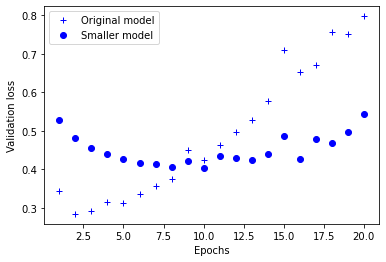

In [9]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# Add weight regularization

In [10]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [12]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 26ms/step - loss: 0.5231 - acc: 0.8158 - val_loss: 0.4141 - val_acc: 0.8691
Epoch 2/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3413 - acc: 0.9007 - val_loss: 0.3505 - val_acc: 0.8864
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2898 - acc: 0.9158 - val_loss: 0.3367 - val_acc: 0.8867
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2661 - acc: 0.9242 - val_loss: 0.3336 - val_acc: 0.8888
Epoch 5/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2526 - acc: 0.9290 - val_loss: 0.3421 - val_acc: 0.8842
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2429 - acc: 0.9320 - val_loss: 0.3484 - val_acc: 0.8817
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2343 - acc: 0.9378 - val_loss: 0.3458 - val_acc: 0.8840
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2299 - a

# Compare original model with regularized model

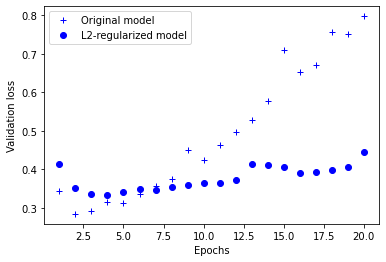

In [13]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# Add dropout

In [15]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [16]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 26ms/step - loss: 0.6151 - acc: 0.6564 - val_loss: 0.4839 - val_acc: 0.8601
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.4591 - acc: 0.8036 - val_loss: 0.3457 - val_acc: 0.8812
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3735 - acc: 0.8598 - val_loss: 0.3106 - val_acc: 0.8860
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3162 - acc: 0.8924 - val_loss: 0.2880 - val_acc: 0.8881
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2724 - acc: 0.9094 - val_loss: 0.2842 - val_acc: 0.8862
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2497 - acc: 0.9180 - val_loss: 0.2896 - val_acc: 0.8854
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2248 - acc: 0.9273 - val_loss: 0.3137 - val_acc: 0.8791
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2100 - a

# Compare with the original model

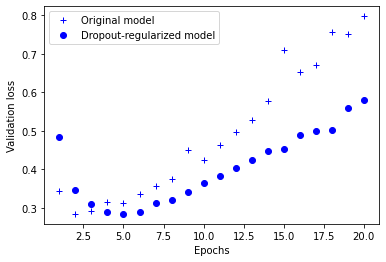

In [17]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()